In [1]:
import decode_eeg
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'C01'
data_dir = f'./data/{experiment_name}'
exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)

In [3]:
time_window = 50
time_step = 25
trial_average = 20
n_splits = 30
group_dict = {0:[12],1:[13]}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

In [4]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.setup_data(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_split(xdata,ydata):
        X_test_all, y_test = wrangl.balance_labels(X_test_all,y_test)
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7


Saving output\figures\h1vsl1acc.pdf
Saving output\figures\h1vsl1acc.png


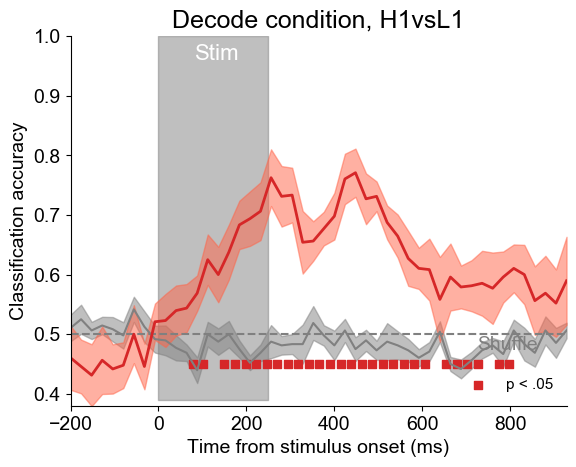

Mean delay accuracy: 0.6431034482758622
Mean delay S.D.: 0.06920479026608076


In [5]:
interp = decode_eeg.Interpreter(clfr,subtitle='h1vsl1')
interp.labels = [1,2]
# interp.save_results()
interp.plot_acc(significance_testing=True,savefig=True,ylim=[.38,1],chance_text_y=.19, title='Decode condition, H1vsL1')

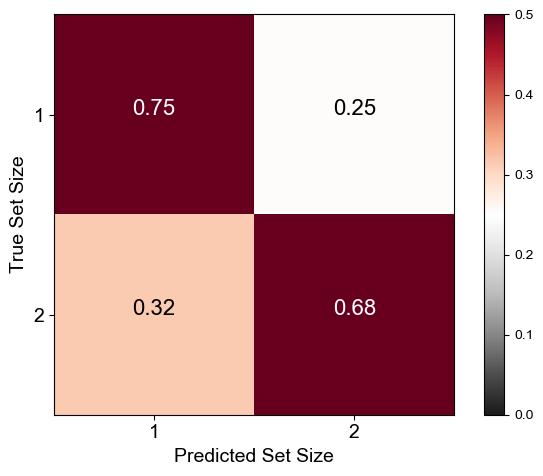

In [6]:
interp.plot_conf_mat(upper=.5,time_idx=(interp.t>250)&(interp.t<450))